# STA130 Homework 08


### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*<br>

(a)A Classification Decision Tree is designed to solve classification problems. The objective is to categorize instances into predefined groups(branches). The model works by splitting data at decision nodes and directing observations to terminal nodes (leaves), each related with a class label.

Example of real-world:
1. Medical Diagnosis: Grouping patients into categories like "low risk" or "high risk" based on clinical data and test results.
2. Customer Segmentation: Classifying customers into categories like "high-value" or "low-value" based on purchase history and behavior.
3. Credit Risk Assessment: Evaluating loan applicants as "low-risk" or "high-risk" based on financial and demographic data.

(b)
Classification decision tree start at the root node and evaluate a decision rule at each node. Following the appropriate branch based on the rule’s outcome, and continue until reaching a leaf node, which provides the predicted class. Classification decision tree produces categorical predictions, such as yes or no. Also, it can handles non-linear relationships by splitting the data into distinct regions.

Multiple Linear Regression apply the formula ^y = B0+B1x1+B2x2+...+Bnxn, where B represents coefficients and x represents the input features. MLR model produces continuous numeric predictions, such as a price or temperature and assumes a linear relationship between input features and the target.

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>


1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

For general classification tasks where false positives and false negatives have similar levels of importance. Accuracy provides an overall performance measure but may lose significance in imbalanced datasets.
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

For situations where missing positive cases (false negatives) has serious situation. Since sensitivity prioritizes finding all true positives, even if it results in a higher number of false positives.
3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

When avoiding false positives is necessary. Emphasizing correctly identifying true negatives to prevent unneeded interventions or costs.

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

Important when false positives are more harmful than false negatives. Ensuring that positive predictions are accurate, making the model's decisions reliable and actionable.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below<br>

 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _`NaN` entries can't be used in their raw form with the `scikit-learn` methodologies, so we do need to remove them to proceed with our analyses._
>     
> _Only remove rows with `NaN` entries once you've subset to the columns you're interested in. This will minimize potentially unnecessary data loss..._
>
> _It would be possible to consider imputing missing data to further mitigate data loss, but the considerations for doing so are more advanced than the level of our course, so we'll not consider that for now._ 

</details>

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

#1
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab = ab.drop(columns=columns_to_remove, errors='ignore')

#2
ab = ab.dropna()

#3
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

print(ab)

                                                 Title               Author  \
0    1,001 Facts that Will Scare the S#*t Out of Yo...          Cary McNeal   
1    21: Bringing Down the House - Movie Tie-In: Th...          Ben Mezrich   
2         100 Best-Loved Poems (Dover Thrift Editions)                Smith   
3              1421: The Year China Discovered America        Gavin Menzies   
4      1493: Uncovering the New World Columbus Created      Charles C. Mann   
..                                                 ...                  ...   
320                            Where the Sidewalk Ends     Shel Silverstein   
321                                    White Privilege  Paula S. Rothenberg   
322                                Why I wore lipstick        Geralyn Lucas   
323  Worlds Together, Worlds Apart: A History of th...        Robert Tignor   
324                                  Wuthering Heights         Emily Bronte   

     List Price  Amazon Price Hard_or_Paper  NumPag

In [ ]:
### Chat Summary:

1. **Explained Classification Decision Trees**:
   - Address **classification problems** by assigning observations to predefined classes through a series of sequential decisions.
   - Compared to **Multiple Linear Regression**, Decision Trees make categorical predictions based on splits in the feature space.

2. **Explored Evaluation Metrics**:
   - Discussed metrics like **Accuracy**, **Sensitivity**, **Specificity**, and **Precision**, linking each to appropriate real-world applications (e.g., medical diagnosis, fraud detection).

3. **Mock Dataset Creation and Processing**:
   - Created a mock dataset with features like "List Price," "NumPages," "Pub year," and "Hard_or_Paper."
   - Demonstrated preprocessing steps (removing columns, handling missing values, setting data types) and splitting the dataset into training and testing sets.

4. **Decision Tree Classifier Training**:
   - Trained a DecisionTreeClassifier to predict book type ("Hardcover" or "Paperback") using "List Price" as the sole feature.
   - Visualized the decision tree to interpret how predictions are made based on thresholds in "List Price."

5. **Breast Cancer Dataset**:
   - Used the breast cancer dataset to create an 80/20 train-test split.
   - Trained another DecisionTreeClassifier to classify tumors as malignant or benign using "mean radius" as the feature.
   - Visualized and explained the decision tree's predictions.

### Key Outcomes:
- Learned how to preprocess datasets and split data for training/testing.
- Understood how to train and interpret DecisionTreeClassifier models in Python.
- Visualized decision trees to understand how predictions are made based on feature splits.

link:https://chatgpt.com/c/673e2bb0-ef94-800b-9542-7c437b947bd4

### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _To complete the final 80/20 split of the **observations** in a reproducible way, set a "random seed"._ 
> 
> - _A single **observation** consists of all the measurements made on a single entity, typically corresponding to a row of a data frame. In **Machine Learning**, a collection of values of interest measured for a single entity is called a "vector" and so the **observation** is referred to as a **vector**_.
>    
> _Asking the ChatBot about "DecisionTreeClassifier .fit(...)" can be helpful here..._
> 
> _Should you use the "ab_reduced_noNaN" data, or the "ab_reduced_noNaN_train" data, or the "ab_reduced_noNaN_test" data to initially fit the classification tree? Why?_
>    
> _You can visualize your decision tree using the `tree.plot_tree(clf)` function shown in the `sklearn` documentation [here](
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#what-is-the-values-array-used-here) and [here](https://scikit-learn.org/stable/modules/tree.html); but, to make it more immediately readible it might be better to use `graphviz`, which is demonstrated in the `sklearn` documentation [here](https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees)_ 
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

Training data size: 455
Test data size: 114


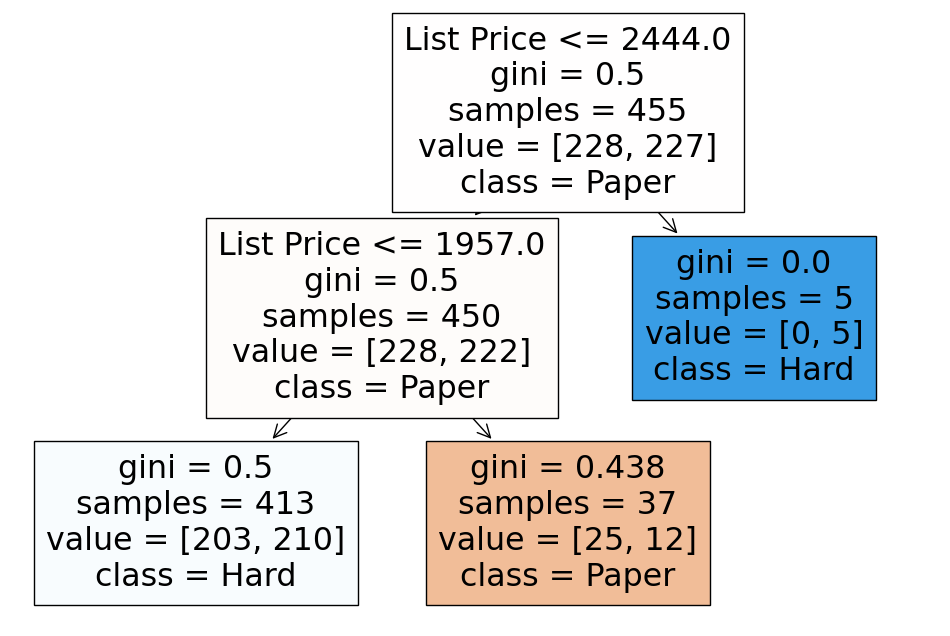

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
cancer_data = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Let's assume that the 'Hard_or_Paper' column refers to a book's type (hardcover or paperback).
# For demonstration purposes, we will simulate a similar column in the dataset.
# Create a mock 'Hard_or_Paper' column for classification (assuming binary class 0=paperback, 1=hardcover)
np.random.seed(42)
cancer_df['Hard_or_Paper'] = np.random.choice(['Hard', 'Paper'], size=cancer_df.shape[0])

# Simulate a 'List Price' column (assuming the 'mean radius' as the 'List Price' for simplicity)
cancer_df['List Price'] = cancer_df['mean radius'] * 100  # Just as a proxy for list price

# Split data into 80% train and 20% test
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(cancer_df, test_size=0.2, random_state=42)

# Check the sizes of the splits
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]
print(f"Training data size: {train_size}")
print(f"Test data size: {test_size}")

# Prepare the labels (y) and features (X)
y = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['Hard']  # This converts 'Hard'/'Paper' to binary, Hard as 1 and Paper as 0, this process is necessary, since the decisiontree classifire need numerical values for target variable
X = ab_reduced_noNaN_train[['List Price']]  # Using 'List Price' as the feature for prediction, to predict the book is a paperback or hard cover

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()


<details class="details-example"><summary style="color:blue"><u>Continue now...?</u></summary>

### Pre-lecture VS Post-lecture HW

Feel free to work on the "Post-lecture" HW below if you're making good progress and want to continue: for **HW 08** this could be reasonable because, as you'll see, the process of creating and using **classification decision trees** is quite similar to the process for creating and using **multiple linear regression** models. There are differences of course, such as how there is **coefficient hypothesis testing** in **multiple linear regression** and **confusion matrices** in **classification decision trees**, and so on. But you would very likely be able to leverage the silarities to make a lot of progress with **classification decision trees** based on your experience with **multiple linear regression**.
    
*The benefits of continue would are that (a) Consolidate the knowledge already learned and integrate it comprehensively. (b) Let you build experience interacting with ChatBots (and understand their strengths and limitations in this regard)... it's good to have sense of when using a ChatBot is the best way to figure something out, or if another approach (such as course provided resources or a plain old websearch for the right resourse) would be more effective*
    
</details>    

## "Post-lecture" HW [*submission along with "Pre-lecture" HW is due prior to next TUT*]


### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
The decision tree uses three features ‘NumPages’, ‘Thick’ and ‘List Price’ to figure out if a book is a hardcover or a paperback. The tree starts at the root and checks one feature, like NumPages, against a certain value. Depending on whether the feature is higher or lower than that value, the tree moves left or right. This process continues, with the tree using more features and thresholds at each level, until it reaches a final point.  Each leaf gives a prediction, like "Hardcover" or "Paperback,"  with a probability.

2. `max_depth` set to `4`
The tree can split up to 4 times. This helps it make more detailed decisions and avoid overfitting to the training data.

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>


    

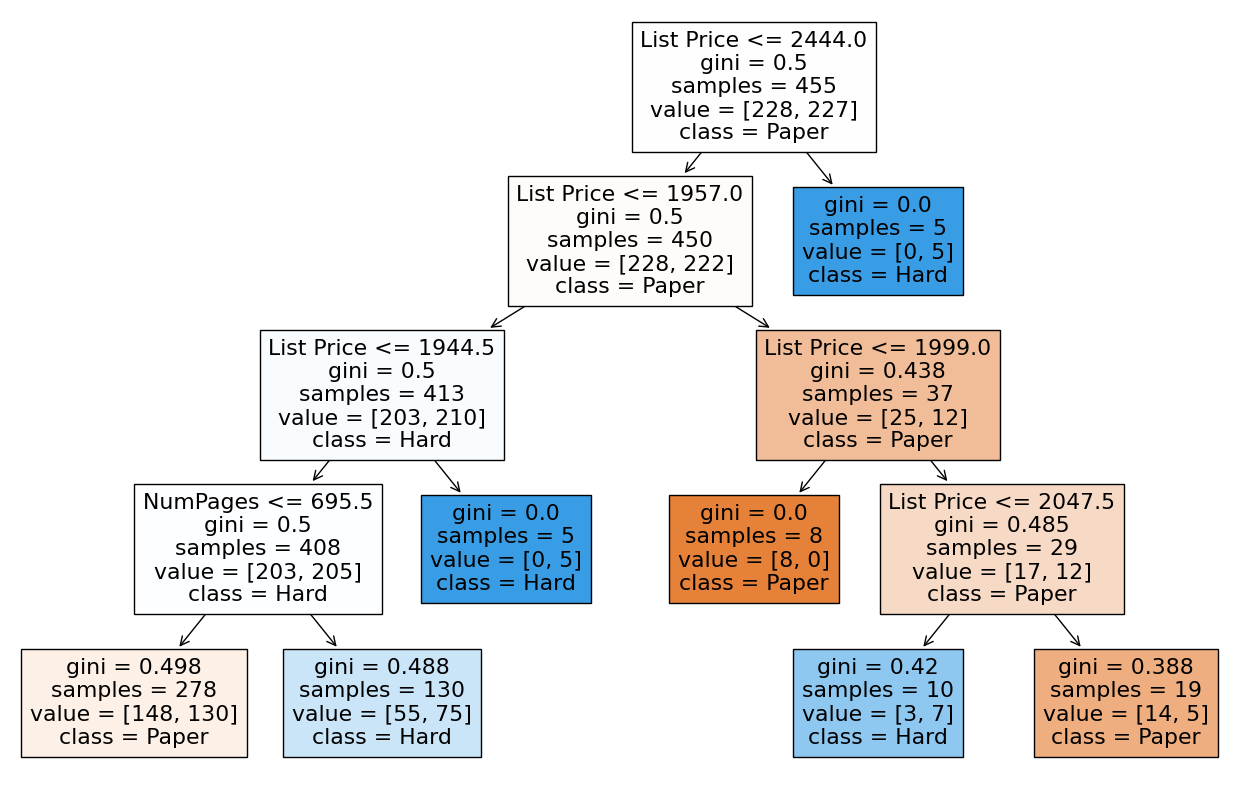

In [6]:
# Simulate 'NumPages' and 'Thick' columns for demonstration purposes
np.random.seed(42)
ab_reduced_noNaN_train['NumPages'] = np.random.randint(50, 1000, size=ab_reduced_noNaN_train.shape[0])
ab_reduced_noNaN_train['Thick'] = np.random.randint(1, 10, size=ab_reduced_noNaN_train.shape[0])

# Prepare the features (X) and labels (y)
X2 = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y2 = pd.get_dummies(ab_reduced_noNaN_train['Hard_or_Paper'])['Hard']  # Target variable

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model
clf2.fit(X2, y2)

# Visualize the decision tree
plt.figure(figsize=(16,10))
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paper', 'Hard'], filled=True)
plt.show()


### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>

True Positive (TP): Predicted Hard and is actually Hard.

True Negative (TN): Predicted Paper and is actually Paper.

False Positive (FP): Predicted Hard but is actually Paper.

False Negative (FN): Predicted Paper but is actually Hard.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$


$$\text{Sensitivity} = \frac{TP}{TP + FN}$$


$$\text{Specificity} = \frac{TN}{TN + FP}$$

Metrics for clf:
Sensitivity: 0.938
Specificity: 0.121
Accuracy: 0.465

Metrics for clf2:
Sensitivity: 0.354
Specificity: 0.712
Accuracy: 0.561


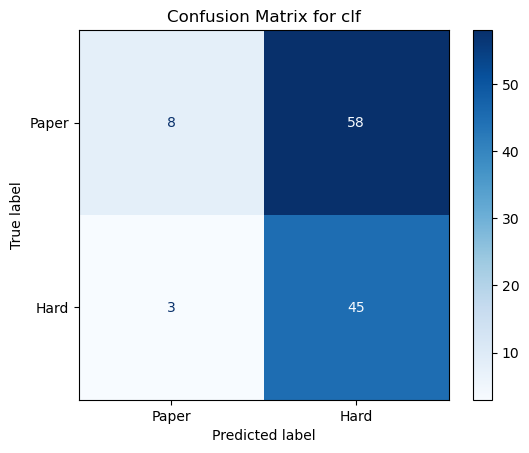

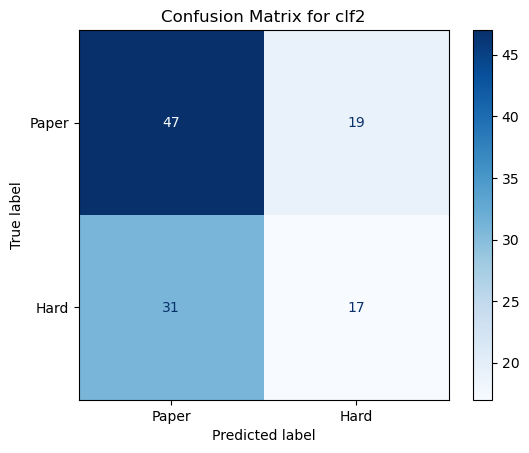

In [8]:
# Simulate 'NumPages' and 'Thick' for the test set
np.random.seed(42)
ab_reduced_noNaN_test['NumPages'] = np.random.randint(50, 1000, size=ab_reduced_noNaN_test.shape[0])
ab_reduced_noNaN_test['Thick'] = np.random.randint(1, 10, size=ab_reduced_noNaN_test.shape[0])

# Prepare test data features and labels for clf and clf2
X_test_clf = ab_reduced_noNaN_test[['List Price']]
y_test_clf = pd.get_dummies(ab_reduced_noNaN_test['Hard_or_Paper'])['Hard']

X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test_clf2 = y_test_clf  # Same target

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Confusion matrices
cm_clf = confusion_matrix(y_test_clf, y_pred_clf)
cm_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)

# Sensitivity, Specificity, and Accuracy for clf
tp_clf, fp_clf, fn_clf, tn_clf = cm_clf[1, 1], cm_clf[0, 1], cm_clf[1, 0], cm_clf[0, 0]
sensitivity_clf = tp_clf / (tp_clf + fn_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = (tp_clf + tn_clf) / np.sum(cm_clf)

# Sensitivity, Specificity, and Accuracy for clf2
tp_clf2, fp_clf2, fn_clf2, tn_clf2 = cm_clf2[1, 1], cm_clf2[0, 1], cm_clf2[1, 0], cm_clf2[0, 0]
sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = (tp_clf2 + tn_clf2) / np.sum(cm_clf2)

# Display results
print("Metrics for clf:")
print(f"Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")

print("\nMetrics for clf2:")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")

# Display confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paper', 'Hard'])
disp_clf.plot(cmap='Blues')
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paper', 'Hard'])
disp_clf2.plot(cmap='Blues')
plt.title("Confusion Matrix for clf2")
plt.show()


### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```


<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

The differences between the two confusion matrices come from the features used for predictions:  

The first matrix shows results for the model `clf` trained only with the List Price feature. Since this feature has limited information, the predictions are simpler and less accurate.  

The second matrix shows predictions made by the `clf` model but uses multiple features NumPages, Thick and List Price, which the model was not trained to handle. This may causes poor predictions because the model doesn’t know how to interpret these features.  

On the other hand, the `clf` and `clf2` are better because the features used for predictions match what the models were trained on. `clf` is trained and evaluated using List Price, and `clf2` uses all three features. This ensures that each model is evaluated properly, leading to more accurate and reliable results.


### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*<br>

The bar chart shows the importance of different feature, higher bar means more contribution to the tree predictions. Through the bar chart, we can see the List price is the most important.

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
  
> The way a **classification decision tree** is fit is that at each step in the construction process of adding a new **decision node splitting rule** to the current **tree structure**, all possible **decision rules** for all possible **predictor variables** are considered, and the combination that improves the **prediction** the most (as measured by the criterion of either "Gini impurity" or "Shannon entropy") and in accordance with the rules of the decision tree (such as the `max_depth` argument) is added to the **classification decision tree**.  Thus overall "criterion" noted above improves with each new **decision node splitting rule**, so the improvement can thus be tracked and the improvement contributions attributed to the **feature** upon which the **decision node splitting rule** is based.  This means the relative contribution of each **predictor variable** to the overall explanatory power of the model can be calculated, and this is what the `.feature_importances_` attribute does. 
>
> Compared to the simplicity of understanding how different **covariates** contribute towards the final **predicted values** of **multiple linear regression models** (by just reading off the equation to see how predictions work), the the complexity of how all the different **features** interact and combine to together to create the final **predictions** from **classification decision trees** can be staggering. But the so-called **feature importance** heuristics allows us to judge how relatively important the overall contributions from different features are in the final decision tree predictions. Now we just need to be sure we're not **overfitting** our **classification decision trees** since they can be so **complex**. Fortunately, the "GridSearchCV" methodology mentioned in regards to finding the best `max_depth` setting for a tree is going to provide a general answer to the challenge of complexity and **overfitting** in **machine learning models** that is not too hard to understand (and which you might already have some guesses or a hunch about). 
> 
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
       
</details>

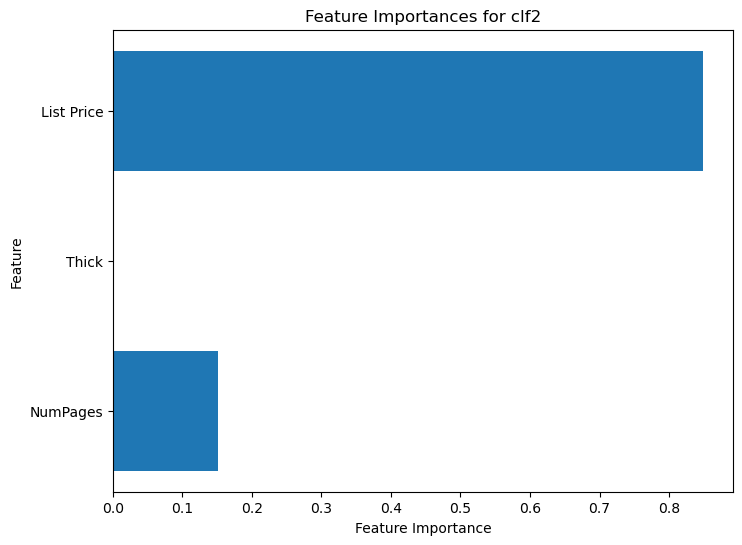

The most important predictor variable is: List Price


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances and corresponding feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar chart to visualize the feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for clf2')
plt.show()

# Find the most important feature
most_important_feature_idx = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_feature_idx]
print(f"The most important predictor variable is: {most_important_feature}")


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Linear model regression predicts continuous real-valued averages for a given configuration of covariate values (or, feature values, if we're using machine learning terminology instead of statistical terminology), whereas a binary classification model such as a binary classification tree predicts 0/1 ("yes" or "no") outcomes (and gives the probability of a 1 "yes" (or "success") outcome from which a 1/0 "yes"/"no" prediction can be made; but, this is not what is being asked here. This question is asking "what's the difference in the way we can interpret and understand how the predictor variables influence the predictions in linear model regression based on the coefficients versus in binary decision trees based on the Feature Importances?"_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

In linear regression, coefficients show the direct relationship between predictor and the outcome. Assuming all other variables stay the same, one unit increase in a predictor can changes the predicted outcome by the value of its coefficient. It is easy to see and measure how each predictor affects the outcome.  

Feature importance in decision trees measures how much each predictor improve the model’s decisions by reducing uncertainty across all the splits where it's used. It shows the overall contribution of a predictor but not a direct effect on the outcome.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>
  
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

>  _Here is the link of [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) in case it gets lost among all the information you need to keep track of_  : )
> 
> _Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)_
    
</details>

In [ ]:
Somewhat